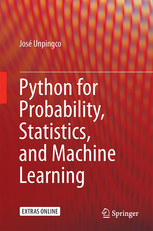

In [8]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

# Moment Generating Functions

Generating moments usually involves integrals that are extremely
difficult to compute. Moment generating functions make this much, much
easier. The moment generating function is defined as,

$$
M(t) = \mathbb{E}(\exp(t X))
$$

 The first moment is the mean, which we can easily compute from 
$M(t)$ as,

$$
\begin{align*}
\frac{dM(t)}{dt} &= \frac{d}{dt}\mathbb{E}(\exp(t X)) = \mathbb{E}\frac{d}{dt}(\exp(t X))\\\
                 &= \mathbb{E}(X \exp(t X))  \\\
\end{align*}
$$

 Now, we have to set $t=0$ and we have the mean,

$$
M^{(1)}(0) = \mathbb{E}(X)
$$

 continuing this derivative process again, we obtain the second moment as,

$$
\begin{align*}
M^{(2)}(t) &= \mathbb{E}(X^2\exp(t X)) \\\
M^{(2)}(0) &= \mathbb{E}(X^2)
\end{align*}
$$

 With this in hand, we can easily compute the variance as,

$$
\mathbb{V}(X) = \mathbb{E}(X^2) -\mathbb{E}(X)^2=M^{(2)}(0)-M^{(1)}(0)^2
$$

**Example.** Returning to our favorite binomial distribution, let's compute
some moments using Sympy.

In [9]:
import sympy as S
from sympy import stats
p,t = S.symbols('p t',positive=True)
x=stats.Binomial('x',10,p)
mgf = stats.E(S.exp(t*x))

 Now, let's compute the first moment (aka, mean) using
the usual integration method and using moment generating functions,

In [10]:
print S.simplify(stats.E(x))
print S.simplify(S.diff(mgf,t).subs(t,0))

10*p
10*p


 Otherwise, we can compute this directly as follows,

In [11]:
print S.simplify(stats.moment(x,1)) # mean
print S.simplify(stats.moment(x,2)) # 2nd moment

10*p
10*p*(9*p + 1)


 In general, the moment generating function for the binomial
distribution is the following,

$$
M_X(t) = \left(p\left(e^t-1\right)+1\right) ^n
$$

A key aspect of moment generating functions is that they are unique identifiers
of probability distributions.  By the uniqueness theorem, given two random
variables $X$ and $Y$, if their respective moment generating functions are
equal, then the corresponding probability distribution functions are equal.

**Example.** Let's use the uniqueness theorem to consider the following
problem. Suppose we know that the probability distribution of $X$ given $U=p$
is binomial with parameters $n$ and $p$. For example, suppose $X$ represents the
number of heads in $n$ coin flips, given the probability of heads is $p$. We 
want to find the unconditional distribution of $X$. Writing out the
moment generating function as the following,

$$
\mathbb{E}(e^{t X}\vert U=p) = (p e^t + 1-p)^n
$$

 Because $U$ is uniform over the unit interval, we can 
integrate this part out

$$
\begin{align*}
\mathbb{E}(e^{t X}) &=\int_0^1 (p e^t + 1-p)^n dp \\\
                    &= \frac{1}{n+1} \frac{e^{t(n+1)-1}}{e^t-1} \\\
                    &= \frac{1}{n+1} (1+e^t+e^{2t}+e^{3t}+\ldots+e^{n t}) \\\
\end{align*}
$$

 Thus, the moment generating function of $X$ corresponds to that of a
random variable that is equally likely to be any of the values $0,1,\ldots,n$.
This is another way of saying that the distribution of $X$ is discrete uniform
over $\lbrace 0,1,\ldots,n \rbrace$. Concretely, suppose we have a box of coins
whose individual probability of heads is unknown and  that we  dump the box on
the floor, spilling all of the coins. If we then count the number of coins facing
heads-up, that distribution is uniform.

Moment generating functions are useful for deriving distributions of
sums of independent random variables. Suppose $X_1$ and $X_2$ are independent
and $Y=X_1+X_2$. Then, the moment generating function of $Y$ follows
from the properties of the expectation,

$$
\begin{align*}
M_Y(t) &= \mathbb{E}(e^{t Y}) =  \mathbb{E}(e^{t X_1 + t X_2}) \\\
       &= \mathbb{E}(e^{t X_1} e^{ t X_2 }) =\mathbb{E}(e^{t X_1})\mathbb{E}(e^{t X_2}) \\\
       &= M_{X_1}(t)M_{X_2}(t)
\end{align*}
$$

**Example.** Suppose we have two normally distributed random variables, 
$X_1\sim \mathcal{N}(\mu_1,\sigma_1)$ and $ X_2\sim \mathcal{N}(\mu_2,\sigma_2)$.
We can save some tedium by exploring this in Sympy,

In [12]:
S.var('x:2',real=True)
S.var('mu:2',real=True)
S.var('sigma:2',positive=True)
S.var('t',positive=True)
x0=stats.Normal(x0,mu0,sigma0)
x1=stats.Normal(x1,mu1,sigma1)

**Programming Tip.**

The `S.var` function defines the variable and injects it into the global
namespace. This is sheer laziness. It is more expressive to define variables
explicitly as in `x = S.symbols('x')`. Also notice that we used the Greek names
for the `mu` and `sigma` variables.  This will come in handy later when we want
to render the equations in the Jupyter/IPython notebook which understands
how to typeset these symbols in \LaTeX{}. The `var('x:2')` creates two
symbols, `x0` and `x1`. Using the colon this way makes it easy to generate
array-like sequences of symbols.



 In the next block we compute the moment generating functions

In [13]:
mgf0=S.simplify(stats.E(S.exp(t*x0)))
mgf1=S.simplify(stats.E(S.exp(t*x1)))
mgfY=S.simplify(mgf0*mgf1)

 The moment generating functions an individual normally distributed
random variable is the following,

$$
e^{\mu_{0} t + \frac{\sigma_{0}^{2} t^{2}}{2}}
$$

 Note the coefficients of $t$. To show that $Y$ is normally
distributed, we want to match the moment generating function of $Y$ to this
format. The following is the form of the moment generating function of $Y$,

$$
M_Y(t)=e^{\frac{t}{2} \left(2 \mu_{0} + 2 \mu_{1} + \sigma_{0}^{2} t + \sigma_{1}^{2} t\right)}
$$

 We can extract the exponent using Sympy and collect on the $t$
variable using the following code,

In [14]:
S.collect(S.expand(S.log(mgfY)),t)

t**2*(sigma0**2/2 + sigma1**2/2) + t*(mu0 + mu1)

 Thus, by the uniqueness theorem, $Y$ is normally distributed with
$\mu_Y=\mu_0+\mu_1$ and $\sigma_Y^2=\sigma_0^2+\sigma_1^2$.

**Programming Tip.**

When using the Jupyter/IPython notebook, you can do `S.init_printing` to get
the mathematical typesetting to work in the browser. Otherwise, if you want to
keep the raw expression and to selectively render to \LaTeX{}, then you can
`from IPython.display import Math`, and then use `Math(S.latex(expr))` to see
the typeset version of the expression.